In [44]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [45]:
# Till 2017
cols17 = ['STU_CWID', 'Term', 'Minority', 'Race_Use','PERM_STATE', 'PARENT_HAS_DEGR', 'ORIG_ADM_TYPE','ORIG_ADM_TRM',
         'SATC_USE', 'SATM','SATV', 'ACTM','ACTE','ACTC','HS_GPA', 'PREV_SCHOOL_NM','ENT1', 'DORM1', 'ATHLETE1', 'PELL_YN', 
         'NEED', 'BUDGET', 'FAFSA', 'ALLAID_F', 'SEX', 'DEG1', 'COL1', 'LGPA1', 'NEED_RANGE_F']
df_17 = pd.read_excel('../1_data/Cohort Retention File.xlsx', usecols = cols17)
df_17.head()

,STU_CWID,Term,SEX,Minority,Race_Use,PERM_STATE,PARENT_HAS_DEGR,ORIG_ADM_TYPE,ORIG_ADM_TRM,SATC_USE,SATM,SATV,ACTC,ACTM,ACTE,HS_GPA,PREV_SCHOOL_NM,DEG1,COL1,ENT1,DORM1,ATHLETE1,LGPA1,NEED_RANGE_F,BUDGET,NEED,ALLAID_F,FAFSA,PELL_YN
0,10263356,13F,M,No,White,FL,Y,FA,13F,1590,790,800,0,0,0,4.45,Hillsborough High School,BME,MA,FA,BIEVR,N,4.000,6) NONEED,61199.0,0.0,24347.00,N,N
1,10209355,07F,F,No,White,ME,Y,FA,07F,1570,800,770,0,0,0,4.53,Bangor High School,BS,HN,FA,BUDIG,NaN,3.233,4) SOMW_NEEDY,38846.0,38264.0,18587.79,Y,Y
2,10228935,09F,F,No,Asian,TX,,FC,09F,1570,770,800,0,0,0,4.27,J Frank Dobie High School,BA,SS,FC,BUDIG,,4.000,5) NONEED-NEED MET,42396.0,39619.0,19810.00,Y,Y
3,10282351,15F,F,No,White,FL,Y,FA,15F,1550,750,800,34,36,36,5.22,Pensacola High School,BD,MA,FA,BUDIG,N,3.953,5) NONEED-NEED MET,54502.0,14210.0,21792.00,Y,N
4,10293987,16F,M,No,White,MS,Y,FA,16F,1540,740,800,0,0,0,4.27,Saint Joseph Catholic School,BS,CAS,FA,BUDIG,N,4.000,4) SOMW_NEEDY,55762.0,46200.0,22184.00,Y,N


In [46]:
df_17['Term'].value_counts()

12F    866
11F    857
17F    801
09F    796
10F    767
08F    690
15F    660
13F    620
16F    612
14F    609
07F    495
Name: Term, dtype: int64

In [47]:
df_17 = df_17[(df_17['Term']== "13F") | (df_17['Term']== "14F") | (df_17['Term']== "15F") | (df_17['Term']== "16F") | 
             (df_17['Term']== "17F")]
df_17['Term'].value_counts()

17F    801
15F    660
13F    620
16F    612
14F    609
Name: Term, dtype: int64

In [48]:
df_17.columns = map(str.lower, df_17.columns)
df_17.head()

,stu_cwid,term,sex,minority,race_use,perm_state,parent_has_degr,orig_adm_type,orig_adm_trm,satc_use,satm,satv,actc,actm,acte,hs_gpa,prev_school_nm,deg1,col1,ent1,dorm1,athlete1,lgpa1,need_range_f,budget,need,allaid_f,fafsa,pell_yn
0,10263356,13F,M,No,White,FL,Y,FA,13F,1590,790,800,0,0,0,4.45,Hillsborough High School,BME,MA,FA,BIEVR,N,4.000,6) NONEED,61199.0,0.0,24347.0,N,N
3,10282351,15F,F,No,White,FL,Y,FA,15F,1550,750,800,34,36,36,5.22,Pensacola High School,BD,MA,FA,BUDIG,N,3.953,5) NONEED-NEED MET,54502.0,14210.0,21792.0,Y,N
4,10293987,16F,M,No,White,MS,Y,FA,16F,1540,740,800,0,0,0,4.27,Saint Joseph Catholic School,BS,CAS,FA,BUDIG,N,4.000,4) SOMW_NEEDY,55762.0,46200.0,22184.0,Y,N
5,10300643,17F,M,No,White,MD,Y,FA,17F,1530,760,770,0,0,0,4.60,Quince Orchard High School,BM,MA,FA,BUDIG,N,3.794,5) NONEED-NEED MET,56314.0,0.0,16000.0,Y,N
7,10283373,15F,M,No,White,NY,Y,FA,15F,1520,770,750,0,0,0,3.65,Regis High School,BBA,BU,FA,BUDIG,N,3.700,3) NEEDY,54502.0,49546.0,21792.0,Y,N


In [49]:
df_17.rename(columns={'stu_cwid':'sid', 'race_use': 'race', 'perm_state':'state', 
                      'parent_has_degr':'non_first_gen', 'orig_adm_type':'adm_type', 'orig_adm_trm':'adm_term', 
                     'satc_use':'sat', 'prev_school_nm':'hs_name'}, inplace=True)
df_17.head()

,sid,term,sex,minority,race,state,non_first_gen,adm_type,adm_term,sat,satm,satv,actc,actm,acte,hs_gpa,hs_name,deg1,col1,ent1,dorm1,athlete1,lgpa1,need_range_f,budget,need,allaid_f,fafsa,pell_yn
0,10263356,13F,M,No,White,FL,Y,FA,13F,1590,790,800,0,0,0,4.45,Hillsborough High School,BME,MA,FA,BIEVR,N,4.000,6) NONEED,61199.0,0.0,24347.0,N,N
3,10282351,15F,F,No,White,FL,Y,FA,15F,1550,750,800,34,36,36,5.22,Pensacola High School,BD,MA,FA,BUDIG,N,3.953,5) NONEED-NEED MET,54502.0,14210.0,21792.0,Y,N
4,10293987,16F,M,No,White,MS,Y,FA,16F,1540,740,800,0,0,0,4.27,Saint Joseph Catholic School,BS,CAS,FA,BUDIG,N,4.000,4) SOMW_NEEDY,55762.0,46200.0,22184.0,Y,N
5,10300643,17F,M,No,White,MD,Y,FA,17F,1530,760,770,0,0,0,4.60,Quince Orchard High School,BM,MA,FA,BUDIG,N,3.794,5) NONEED-NEED MET,56314.0,0.0,16000.0,Y,N
7,10283373,15F,M,No,White,NY,Y,FA,15F,1520,770,750,0,0,0,3.65,Regis High School,BBA,BU,FA,BUDIG,N,3.700,3) NEEDY,54502.0,49546.0,21792.0,Y,N


In [50]:
df_17['sid'].nunique() - df_17['sid'].count()

0

In [51]:
pd.crosstab(df_17['minority'], df_17['race'])
#international, multiracial, Unknown, and whites not counted as minorities

race,Asian,Black,Hawaiian,Hispanic,International,Multiracial,Native Am.,Other,Unknown,White
minority,,,,,,,,,,
No,113,0,0,0,0,182,0,0,0,1623
Remove,0,0,0,0,73,0,0,0,161,0
Yes,0,547,3,559,0,0,13,28,0,0


In [52]:
df_17['minority_num'] = pd.Series(np.where(df_17.minority.values == 'Yes', 1, 0), df_17.index)
pd.crosstab(df_17['minority'], df_17['minority_num']) #ok

minority_num,0,1
minority,,
No,1918,0
Remove,234,0
Yes,0,1150


In [53]:
df_17['instate'] = pd.Series(np.where(df_17.state.values == 'LA', 1, 0), df_17.index)
pd.crosstab(df_17['state'], df_17['instate'])

instate,0,1
state,,
,85,0
AE,1,0
AK,3,0
AL,67,0
AR,10,0
AZ,9,0
CA,204,0
CO,16,0
CT,57,0


In [54]:
df_17['first_gen'] = pd.Series(np.where(df_17.non_first_gen.values == 'N', 1, 0), df_17.index)
print(pd.crosstab(df_17['first_gen'], df_17['non_first_gen']))

df_17['athlete'] = pd.Series(np.where(df_17.athlete1.values == 'Y', 1, 0), df_17.index)
print(pd.crosstab(df_17['athlete'], df_17['athlete1']))

df_17['fafsa_num'] = pd.Series(np.where(df_17.fafsa.values == 'Y', 1, 0), df_17.index)
print(pd.crosstab(df_17['fafsa_num'], df_17['fafsa']))

df_17['pell'] = pd.Series(np.where(df_17.pell_yn.values == 'Y', 1, 0), df_17.index)
print(pd.crosstab(df_17['pell'], df_17['pell_yn']))

non_first_gen       N     Y
first_gen                  
0              3    0  2376
1              0  923     0
athlete1     N    Y
athlete            
0         3004    0
1            0  298
fafsa        N     Y
fafsa_num           
0          243     0
1            0  3023
pell_yn     N     Y
pell               
0        2156     0
1           0  1146


In [55]:
df_17.head()

,sid,term,sex,minority,race,state,non_first_gen,adm_type,adm_term,sat,satm,satv,actc,actm,acte,hs_gpa,hs_name,deg1,col1,ent1,dorm1,athlete1,lgpa1,need_range_f,budget,need,allaid_f,fafsa,pell_yn,minority_num,instate,first_gen,athlete,fafsa_num,pell
0,10263356,13F,M,No,White,FL,Y,FA,13F,1590,790,800,0,0,0,4.45,Hillsborough High School,BME,MA,FA,BIEVR,N,4.000,6) NONEED,61199.0,0.0,24347.0,N,N,0,0,0,0,0,0
3,10282351,15F,F,No,White,FL,Y,FA,15F,1550,750,800,34,36,36,5.22,Pensacola High School,BD,MA,FA,BUDIG,N,3.953,5) NONEED-NEED MET,54502.0,14210.0,21792.0,Y,N,0,0,0,0,1,0
4,10293987,16F,M,No,White,MS,Y,FA,16F,1540,740,800,0,0,0,4.27,Saint Joseph Catholic School,BS,CAS,FA,BUDIG,N,4.000,4) SOMW_NEEDY,55762.0,46200.0,22184.0,Y,N,0,0,0,0,1,0
5,10300643,17F,M,No,White,MD,Y,FA,17F,1530,760,770,0,0,0,4.60,Quince Orchard High School,BM,MA,FA,BUDIG,N,3.794,5) NONEED-NEED MET,56314.0,0.0,16000.0,Y,N,0,0,0,0,1,0
7,10283373,15F,M,No,White,NY,Y,FA,15F,1520,770,750,0,0,0,3.65,Regis High School,BBA,BU,FA,BUDIG,N,3.700,3) NEEDY,54502.0,49546.0,21792.0,Y,N,0,0,0,0,1,0


In [56]:
pd.crosstab(df_17['adm_type'], df_17['ent1'])

ent1,FA,FB,FC,FE,FK,FL
adm_type,,,,,,
FA,2495,0,0,0,0,0
FB,0,362,0,0,0,0
FC,0,0,432,0,0,0
FE,0,0,0,11,0,0
FK,0,0,0,0,1,0
FL,0,0,0,0,0,1


In [57]:
df_17['fa_adm_type'] = pd.Series(np.where(df_17.adm_type.values == 'FA', 1, 0), df_17.index)
print(pd.crosstab(df_17['fa_adm_type'], df_17['adm_type']))

adm_type       FA   FB   FC  FE  FK  FL
fa_adm_type                            
0               0  362  432  11   1   1
1            2495    0    0   0   0   0


In [58]:
pd.crosstab(df_17['adm_term'], df_17['term'])

term,13F,14F,15F,16F,17F
adm_term,,,,,
13F,582,0,0,0,0
13M,38,0,0,0,0
14F,0,575,0,0,0
14M,0,34,0,0,0
15F,0,0,658,0,0
15M,0,0,2,0,0
16F,0,0,0,611,0
16M,0,0,0,1,0
17F,0,0,0,0,801


In [59]:
df_17['hs_gpa'].describe()

count    3302.000000
mean        3.476829
std         0.734049
min         0.000000
25%         3.120000
50%         3.550000
75%         3.920000
max         5.240000
Name: hs_gpa, dtype: float64

In [60]:
df_17['hs_gpa'][df_17['hs_gpa']!=0].describe()

count    3238.000000
mean        3.545550
std         0.552951
min         1.560000
25%         3.150000
50%         3.570000
75%         3.930000
max         5.240000
Name: hs_gpa, dtype: float64

In [61]:
df_17['adm_term'][df_17['hs_gpa']==0].value_counts()

16F    38
15F    18
13F     5
14F     3
Name: adm_term, dtype: int64

In [62]:
df_17['hs_gpa'][df_17['hs_gpa']>4] = df_17['hs_gpa']*0.8
df_17['hs_gpa'][df_17['hs_gpa']>4] = 4
df_17['hs_gpa'].describe()

count    3302.000000
mean        3.316061
std         0.611360
min         0.000000
25%         3.120000
50%         3.400000
75%         3.694500
max         4.000000
Name: hs_gpa, dtype: float64

In [63]:
df_17['hs_gpa'][df_17['hs_gpa']==0] = 3.40 #replace with mean
df_17['hs_gpa'].describe()

count    3302.000000
mean        3.381960
std         0.395421
min         1.560000
25%         3.160000
50%         3.400000
75%         3.694500
max         4.000000
Name: hs_gpa, dtype: float64

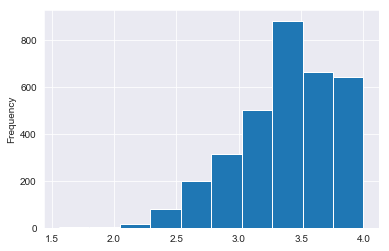

In [64]:
df_17['hs_gpa'].plot.hist();

In [65]:
df_17['hs_gpa'].isnull().sum().sum() #ok

0

In [66]:
df_17['intl']=0
df_17['intl'][df_17['race'] == "International"] = 1
pd.crosstab(df_17['race'], df_17['intl'])

intl,0,1
race,,
Asian,113,0
Black,547,0
Hawaiian,3,0
Hispanic,559,0
International,0,73
Multiracial,182,0
Native Am.,13,0
Other,28,0
Unknown,161,0


In [67]:
df_17['sat'].isnull().sum().sum()

0

In [68]:
df_17['sat'].describe()

count    3302.000000
mean     1139.657783
std       191.541455
min         0.000000
25%      1040.000000
50%      1150.000000
75%      1260.000000
max      1600.000000
Name: sat, dtype: float64

In [69]:
df_17['sat'][df_17['sat']== 0].count()

43

In [70]:
df_17['term'][df_17['sat']== 0].value_counts() #replace by means

13F    16
14F    12
15F     7
17F     5
16F     3
Name: term, dtype: int64

In [71]:
df_17['sat'][df_17['sat']== 0] = 1150
df_17['sat'].describe()

count    3302.000000
mean     1154.633555
std       139.808051
min       740.000000
25%      1050.000000
50%      1150.000000
75%      1260.000000
max      1600.000000
Name: sat, dtype: float64

In [72]:
df_17.head()

,sid,term,sex,minority,race,state,non_first_gen,adm_type,adm_term,sat,satm,satv,actc,actm,acte,hs_gpa,hs_name,deg1,col1,ent1,dorm1,athlete1,lgpa1,need_range_f,budget,need,allaid_f,fafsa,pell_yn,minority_num,instate,first_gen,athlete,fafsa_num,pell,fa_adm_type,intl
0,10263356,13F,M,No,White,FL,Y,FA,13F,1590,790,800,0,0,0,3.560,Hillsborough High School,BME,MA,FA,BIEVR,N,4.000,6) NONEED,61199.0,0.0,24347.0,N,N,0,0,0,0,0,0,1,0
3,10282351,15F,F,No,White,FL,Y,FA,15F,1550,750,800,34,36,36,4.000,Pensacola High School,BD,MA,FA,BUDIG,N,3.953,5) NONEED-NEED MET,54502.0,14210.0,21792.0,Y,N,0,0,0,0,1,0,1,0
4,10293987,16F,M,No,White,MS,Y,FA,16F,1540,740,800,0,0,0,3.416,Saint Joseph Catholic School,BS,CAS,FA,BUDIG,N,4.000,4) SOMW_NEEDY,55762.0,46200.0,22184.0,Y,N,0,0,0,0,1,0,1,0
5,10300643,17F,M,No,White,MD,Y,FA,17F,1530,760,770,0,0,0,3.680,Quince Orchard High School,BM,MA,FA,BUDIG,N,3.794,5) NONEED-NEED MET,56314.0,0.0,16000.0,Y,N,0,0,0,0,1,0,1,0
7,10283373,15F,M,No,White,NY,Y,FA,15F,1520,770,750,0,0,0,3.650,Regis High School,BBA,BU,FA,BUDIG,N,3.700,3) NEEDY,54502.0,49546.0,21792.0,Y,N,0,0,0,0,1,0,1,0


In [73]:
pd.crosstab(df_17['deg1'], df_17['col1'])

col1,BU,CAS,MA
deg1,,,
BA,0,905,141
BAM,0,0,2
BAU,45,0,0
BBA,404,0,0
BD,0,0,50
BFA,0,0,77
BM,0,0,189
BME,0,0,48
BMT,0,0,72


In [74]:
df_17['dorm1'].value_counts(dropna = False)

BIEVR    1862
BUDIG     833
          603
CARRL       3
DBLRM       1
Name: dorm1, dtype: int64

In [75]:
df_17['resident'] = 0
df_17['resident'][(df_17['dorm1'] == "BIEVR") | (df_17['dorm1'] == "BUDIG") | (df_17['dorm1'] == "CARRL") | 
                  (df_17['dorm1'] == "DBLRM")] = 1
df_17['resident'].value_counts()

1    2699
0     603
Name: resident, dtype: int64

In [76]:
df_17['male'] = pd.Series(np.where(df_17.sex.values == 'M', 1, 0), df_17.index)
print(pd.crosstab(df_17['male'], df_17['sex']))

sex      F     M
male            
0     2071     0
1        0  1231


In [77]:
df_17['fc_adm_type'] = pd.Series(np.where(df_17.adm_type.values == 'FC', 1, 0), df_17.index)
print(pd.crosstab(df_17['fc_adm_type'], df_17['adm_type']))

adm_type       FA   FB   FC  FE  FK  FL
fc_adm_type                            
0            2495  362    0  11   1   1
1               0    0  432   0   0   0


In [78]:
df_17.head()

,sid,term,sex,minority,race,state,non_first_gen,adm_type,adm_term,sat,satm,satv,actc,actm,acte,hs_gpa,hs_name,deg1,col1,ent1,dorm1,athlete1,lgpa1,need_range_f,budget,need,allaid_f,fafsa,pell_yn,minority_num,instate,first_gen,athlete,fafsa_num,pell,fa_adm_type,intl,resident,male,fc_adm_type
0,10263356,13F,M,No,White,FL,Y,FA,13F,1590,790,800,0,0,0,3.560,Hillsborough High School,BME,MA,FA,BIEVR,N,4.000,6) NONEED,61199.0,0.0,24347.0,N,N,0,0,0,0,0,0,1,0,1,1,0
3,10282351,15F,F,No,White,FL,Y,FA,15F,1550,750,800,34,36,36,4.000,Pensacola High School,BD,MA,FA,BUDIG,N,3.953,5) NONEED-NEED MET,54502.0,14210.0,21792.0,Y,N,0,0,0,0,1,0,1,0,1,0,0
4,10293987,16F,M,No,White,MS,Y,FA,16F,1540,740,800,0,0,0,3.416,Saint Joseph Catholic School,BS,CAS,FA,BUDIG,N,4.000,4) SOMW_NEEDY,55762.0,46200.0,22184.0,Y,N,0,0,0,0,1,0,1,0,1,1,0
5,10300643,17F,M,No,White,MD,Y,FA,17F,1530,760,770,0,0,0,3.680,Quince Orchard High School,BM,MA,FA,BUDIG,N,3.794,5) NONEED-NEED MET,56314.0,0.0,16000.0,Y,N,0,0,0,0,1,0,1,0,1,1,0
7,10283373,15F,M,No,White,NY,Y,FA,15F,1520,770,750,0,0,0,3.650,Regis High School,BBA,BU,FA,BUDIG,N,3.700,3) NEEDY,54502.0,49546.0,21792.0,Y,N,0,0,0,0,1,0,1,0,1,1,0


In [79]:
df_final = df_17[['sid', 'term', 'minority_num', 'race', 'first_gen', 'fa_adm_type', 'fc_adm_type','sat', 
                  'hs_gpa', 'deg1', 'col1', 'resident', 'budget', 'need', 'allaid_f', 'instate', 'athlete', 'fafsa_num', 
                  'pell', 'intl', 'male', 'lgpa1', 'need_range_f']]

In [80]:
df_final.set_index('sid', inplace=True)
df_final.head()

,term,minority_num,race,first_gen,fa_adm_type,fc_adm_type,sat,hs_gpa,deg1,col1,resident,budget,need,allaid_f,instate,athlete,fafsa_num,pell,intl,male,lgpa1,need_range_f
sid,,,,,,,,,,,,,,,,,,,,,,
10263356,13F,0,White,0,1,0,1590,3.560,BME,MA,1,61199.0,0.0,24347.0,0,0,0,0,0,1,4.000,6) NONEED
10282351,15F,0,White,0,1,0,1550,4.000,BD,MA,1,54502.0,14210.0,21792.0,0,0,1,0,0,0,3.953,5) NONEED-NEED MET
10293987,16F,0,White,0,1,0,1540,3.416,BS,CAS,1,55762.0,46200.0,22184.0,0,0,1,0,0,1,4.000,4) SOMW_NEEDY
10300643,17F,0,White,0,1,0,1530,3.680,BM,MA,1,56314.0,0.0,16000.0,0,0,1,0,0,1,3.794,5) NONEED-NEED MET
10283373,15F,0,White,0,1,0,1520,3.650,BBA,BU,1,54502.0,49546.0,21792.0,0,0,1,0,0,1,3.700,3) NEEDY


In [81]:
df_final['term'].count()

3302

In [82]:
df_final['col1'].value_counts()

CAS    1885
MA      927
BU      490
Name: col1, dtype: int64

In [83]:
df_final.reset_index(inplace=True)

In [84]:
df_final.head()

,sid,term,minority_num,race,first_gen,fa_adm_type,fc_adm_type,sat,hs_gpa,deg1,col1,resident,budget,need,allaid_f,instate,athlete,fafsa_num,pell,intl,male,lgpa1,need_range_f
0,10263356,13F,0,White,0,1,0,1590,3.560,BME,MA,1,61199.0,0.0,24347.0,0,0,0,0,0,1,4.000,6) NONEED
1,10282351,15F,0,White,0,1,0,1550,4.000,BD,MA,1,54502.0,14210.0,21792.0,0,0,1,0,0,0,3.953,5) NONEED-NEED MET
2,10293987,16F,0,White,0,1,0,1540,3.416,BS,CAS,1,55762.0,46200.0,22184.0,0,0,1,0,0,1,4.000,4) SOMW_NEEDY
3,10300643,17F,0,White,0,1,0,1530,3.680,BM,MA,1,56314.0,0.0,16000.0,0,0,1,0,0,1,3.794,5) NONEED-NEED MET
4,10283373,15F,0,White,0,1,0,1520,3.650,BBA,BU,1,54502.0,49546.0,21792.0,0,0,1,0,0,1,3.700,3) NEEDY


In [85]:
len(df_final.columns)

23

In [87]:
df_final.drop(['deg1', 'fafsa_num', 'need_range_f'], inplace=True, axis=1)
len(df_final.columns)

20

In [88]:
df_final.head()

,sid,term,minority_num,race,first_gen,fa_adm_type,fc_adm_type,sat,hs_gpa,col1,resident,budget,need,allaid_f,instate,athlete,pell,intl,male,lgpa1
0,10263356,13F,0,White,0,1,0,1590,3.560,MA,1,61199.0,0.0,24347.0,0,0,0,0,1,4.000
1,10282351,15F,0,White,0,1,0,1550,4.000,MA,1,54502.0,14210.0,21792.0,0,0,0,0,0,3.953
2,10293987,16F,0,White,0,1,0,1540,3.416,CAS,1,55762.0,46200.0,22184.0,0,0,0,0,1,4.000
3,10300643,17F,0,White,0,1,0,1530,3.680,MA,1,56314.0,0.0,16000.0,0,0,0,0,1,3.794
4,10283373,15F,0,White,0,1,0,1520,3.650,BU,1,54502.0,49546.0,21792.0,0,0,0,0,1,3.700


In [90]:
df_final.rename(columns={'minority_num':'minority'}, inplace = True)
df_final.to_excel('../3_res/till2017.xlsx')